# Python Assignment 1



* Nur Anisah
* PYTN-KS12-016
* Python for Data Science - Batch 4

### Import library yang dibutuhkan

In [2]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

mpl.style.use('fivethirtyeight')
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.5.2


## Membaca file CSV

In [4]:
df = pd.read_csv('../london_crime_by_lsoa.csv')

In [5]:
#  Menampilkan dimensi dari dataframe  (jumlah baris, jumlah kolom)
df.shape

(13490604, 7)

In [6]:
# Menampilkan 5 teratas dari dataset
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [8]:
# Melihat daftar nama kolom
df.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [9]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [10]:
# Melihat 5 baris terakhir dataset
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [11]:
# menghitung jumlah masing-masing lsoa code
df.lsoa_code.value_counts()

E01003689    3456
E01003783    3456
E01001010    3456
E01001043    3456
E01004735    3456
             ... 
E01001101    1836
E01000001    1728
E01032775    1728
E01000002    1080
E01000003     648
Name: lsoa_code, Length: 4835, dtype: int64

In [12]:
# Menghitung jumlah wilayah (borouhg)
df["borough"].nunique()

33

In [13]:
# Menghitung jumlah masing-masing wilayah
df.borough.value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [14]:
# Menghitung jumlah masing-masing major category
df.major_category.value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [15]:
# Menghitung jumlah masing-masing minor category
df.minor_category.value_counts()

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

In [18]:
# Melihat wilayah/borough mana yang paling sering terjadi major_category
df_major = df.groupby(['borough'])['major_category'].value_counts()
df_major

borough               major_category             
Barking and Dagenham  Theft and Handling             91260
                      Violence Against the Person    73224
                      Criminal Damage                46764
                      Drugs                          26244
                      Burglary                       23760
                                                     ...  
Westminster           Burglary                       27648
                      Robbery                        25056
                      Other Notifiable Offences      21924
                      Fraud or Forgery                8748
                      Sexual Offences                 3672
Name: major_category, Length: 295, dtype: int64

In [19]:
# Melihat wilayah/borough mana yang paling sering terjadi minor_category
df_minor = df.groupby(['borough'])['minor_category'].value_counts()
df_minor

borough               minor_category             
Barking and Dagenham  Assault with Injury            11880
                      Burglary in Other Buildings    11880
                      Burglary in a Dwelling         11880
                      Common Assault                 11880
                      Criminal Damage To Dwelling    11880
                                                     ...  
Westminster           Counted per Victim              4968
                      Other Fraud & Forgery           3780
                      Other Sexual                    3132
                      Murder                          2808
                      Rape                             540
Name: minor_category, Length: 1046, dtype: int64

In [20]:
# Mengecek apakah ada kolom yang null 
df.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [21]:
#  Mengelompokkan jumlah kasus tiap wilayah di tahun 2008-2016
df_borough = df.groupby(['borough', 'year'])['value'].sum()
df_borough

borough               year
Barking and Dagenham  2008    17656
                      2009    17713
                      2010    17130
                      2011    16686
                      2012    15990
                              ...  
Westminster           2012    59226
                      2013    53852
                      2014    47564
                      2015    47395
                      2016    48330
Name: value, Length: 297, dtype: int64

# Area Plot

### 1. Area Plot - Persebaran kasus menurut wilayah periode 2008-2016
Menampilkan persebaran jumlah kasus tertinggi dan terendah di wilayah-wilayah pada periode 2008-2016 melalui area plot.

Value : jumlah kasus

Borought : Wilayah

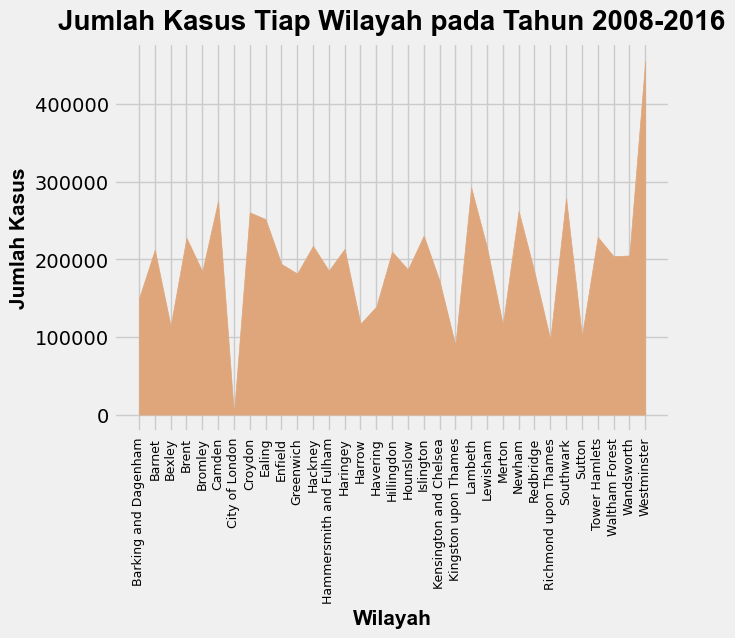

In [31]:
df_bor=df['value'].groupby(df['borough']).sum()

plt.title('Jumlah Kasus Tiap Wilayah pada Tahun 2008-2016', fontdict={'fontname':'Arial', 'fontsize': 20, 'fontweight': 'bold', 'verticalalignment': 'bottom', 'y': 3.1})
plt.fill_between(df_bor.index, df_bor.values, alpha=1, color='#DFA67B')

plt.xticks(rotation=90, fontsize=9)
plt.xlabel('Wilayah', fontsize=15,fontweight = 'semibold', fontname='Arial')
plt.ylabel('Jumlah Kasus', fontsize=15, fontweight = 'semibold', fontname='Arial')

plt.show()

### 2. Area Plot - Persebaran kasus pada tahun 2008
Untuk melihat detail persebaran kasus pada tahun 2008 menggunakan area plot

In [33]:
# filter data for year 2008
df_2008 = df[df['year'] == 2008]

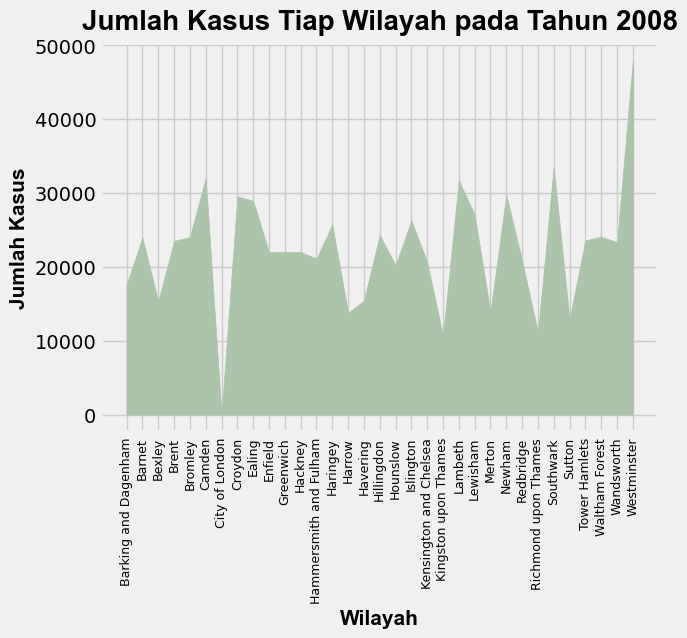

In [34]:
# calculate total crimes per borough in 2008
df_bor_2008 = df_2008['value'].groupby(df_2008['borough']).sum()

# create plot
plt.title('Jumlah Kasus Tiap Wilayah pada Tahun 2008', fontdict={'fontname':'Arial', 'fontsize': 20, 'fontweight': 'bold', 'verticalalignment': 'bottom', 'y': 1.05})
plt.fill_between(df_bor_2008.index, df_bor_2008.values, alpha=1, color='#ABC4AA')

plt.xticks(rotation=90, fontsize=9)
plt.xlabel('Wilayah', fontsize=15, fontweight='semibold', fontname='Arial')
plt.ylabel('Jumlah Kasus', fontsize=15, fontweight='semibold', fontname='Arial')

plt.show()


### 2. Area Plot - Persebaran kasus pada tahun 2016
Untuk melihat detail persebaran kasus pada tahun 2016 menggunakan area plot

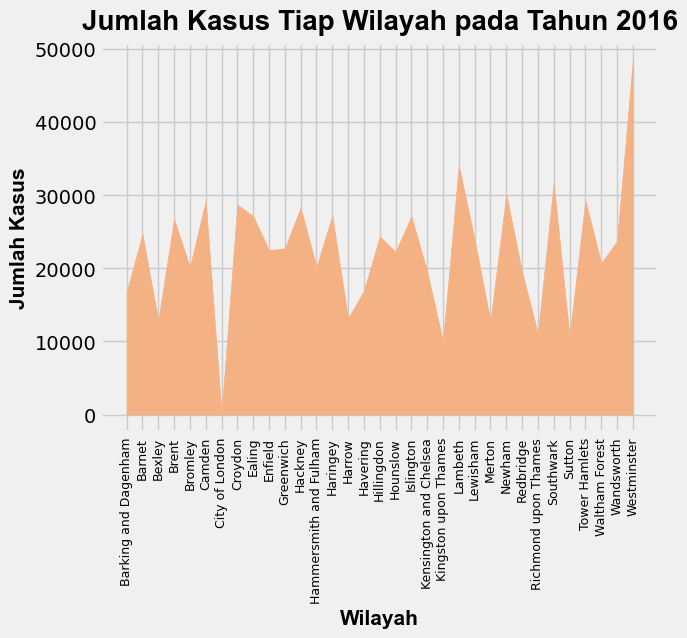

In [30]:
# filter data for year 2016
df_2016 = df[df['year'] == 2016]

# calculate total crimes per borough in 2016
df_bor_2016 = df_2016['value'].groupby(df_2016['borough']).sum()

# create plot
plt.title('Jumlah Kasus Tiap Wilayah pada Tahun 2016', fontdict={'fontname':'Arial', 'fontsize': 20, 'fontweight': 'bold', 'verticalalignment': 'bottom', 'y': 1.05})
plt.fill_between(df_bor_2016.index, df_bor_2016.values, alpha=1, color='#F4B183')

plt.xticks(rotation=90, fontsize=9)
plt.xlabel('Wilayah', fontsize=15, fontweight='semibold', fontname='Arial')
plt.ylabel('Jumlah Kasus', fontsize=15, fontweight='semibold', fontname='Arial')

plt.show()

Analisis dari plot ini dapat dilihat dari beberapa aspek berikut:

1. Wilayah dengan jumlah kasus tertinggi: Dari plot ini, dapat dilihat bahwa wilayah Westminster memiliki jumlah kasus terbanyak dari semua wilayah, diikuti oleh Southwark dan Lambeth. Sementara itu, wilayah City of London memiliki jumlah kasus paling sedikit.

2. Perbedaan jumlah kasus antar wilayah: Dari plot ini, dapat dilihat bahwa ada perbedaan jumlah kasus yang signifikan antara wilayah-wilayah tertentu. Beberapa wilayah memiliki jumlah kasus yang jauh lebih tinggi daripada wilayah lainnya.

3. Tren perubahan jumlah kasus dari waktu ke waktu: Plot ini tidak memperlihatkan tren perubahan jumlah kasus dari waktu ke waktu, karena hanya memperlihatkan jumlah kasus untuk seluruh periode 2008-2016 secara keseluruhan. Namun, plot ini dapat digunakan untuk membandingkan jumlah kasus antar wilayah pada tahun yang sama.


# Line Plot

### 1. Line Plot - Kasus Major Category di Westminster Tahun 2008-2016

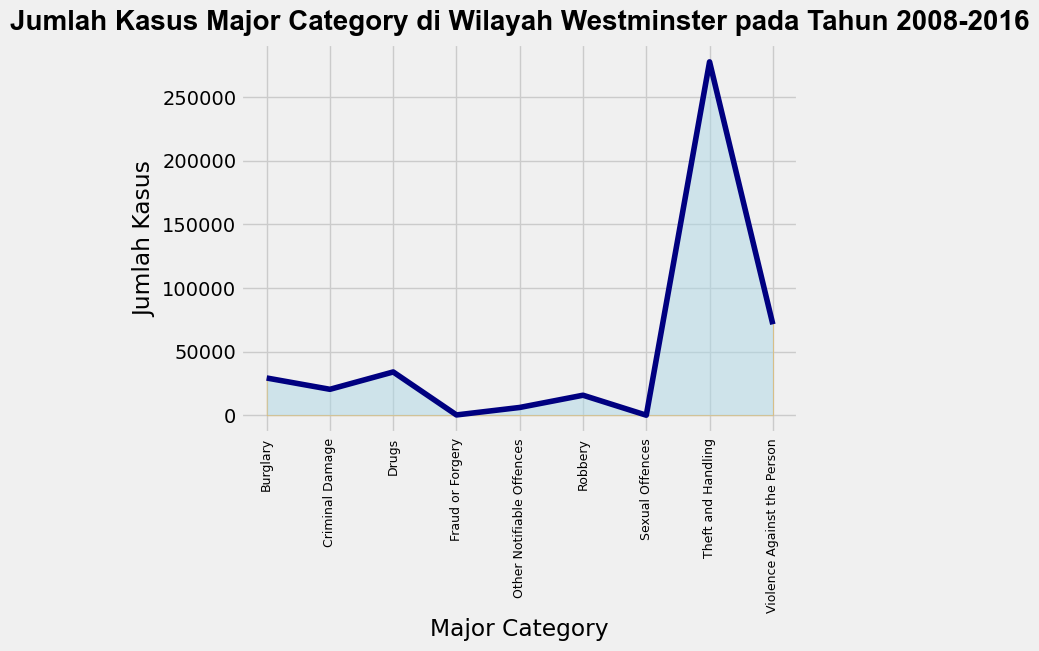

In [40]:
# Creating a variable to store major case data for Westminster.
df_westminster = df[(df['borough']=='Westminster')].groupby('major_category')['value'].sum()

# create plot
plt.title('Jumlah Kasus Major Category di Wilayah Westminster pada Tahun 2008-2016', fontdict={'fontname':'Arial', 'fontsize': 20, 'fontweight': 'bold', 'verticalalignment': 'bottom', 'y': 1.05})
plt.fill_between(df_westminster.index, df_westminster.values, alpha=0.5, color='orange', facecolor='lightblue')
df_westminster.plot(kind='line',color='navy')
plt.xticks(rotation=90, fontsize=9)
plt.xlabel('Major Category')
plt.ylabel('Jumlah Kasus')

plt.show()

### 2. 

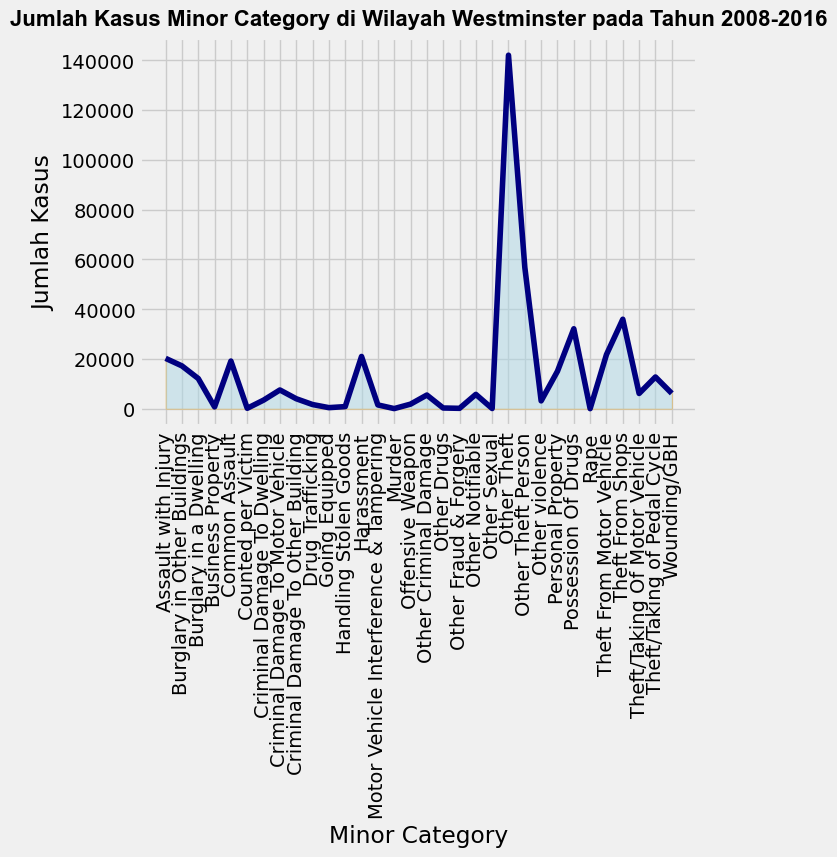

In [39]:
# Creating a variable to store minor case data for Westminster.
df_westminster = df[(df['borough']=='Westminster')].groupby('minor_category')['value'].sum()

# create plot
plt.title('Jumlah Kasus Minor Category di Wilayah Westminster pada Tahun 2008-2016', fontdict={'fontname':'Arial', 'fontsize': 16, 'fontweight': 'bold', 'verticalalignment': 'bottom', 'y': 2.1})
plt.fill_between(df_westminster.index, df_westminster.values, alpha=0.5, color='orange', facecolor='lightblue')
df_westminster.plot(kind='line',color='navy')
plt.xticks(rotation=90)
plt.xlabel('Minor Category')
plt.ylabel('Jumlah Kasus')

plt.show()